# Detecting churn customer 

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import os
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt


In [2]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
data= pd.read_excel(r"CHURNDATA (1).xlsx")


In [4]:
data.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [5]:
data=data.dropna()

In [6]:
data.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [7]:
data

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,XXXXXX,Sep 10 1951 12:00AM,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,XXXXXX,Mar 23 1984 12:00AM,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,XXXXXX,Feb 4 1985 12:00AM,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,XXXXXX,Feb 3 1950 12:00AM,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [8]:
df = pd.DataFrame(data=data, columns=data.feature_names)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

# DELETING UNNECESSARY FEATURES 
quaterly data are highly used to determine churn customer and we can make total sum of quater coloumn out of it too if required 
where else we cannt make quater coloumns from total coloumn 

In [9]:

data=data.drop(['total debit amount','total debit transactions','total credit transactions','total credit amount'],axis=1)

In [10]:
del data['CUS_DOB']
del data['CIF']
del data['CUS_Customer_Since']

In [12]:
data

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,10,24,31,1516981.10,1764079.61,2378592.62,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,2,4,4,10000.00,19500.00,57500.00,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,14,8,5,709625.00,240311.84,70946.86,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,5,4,3,30103.05,28089.99,18753.92,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,8,7,6,195600.00,176000.00,70500.00,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,68,4500.00,MALE,SINGLE,14,13,12,1,3069.60,2376.00,...,0,0,0,0.00,0.00,0.00,26,2223,LOW,CHURN
1245,35,3500000.00,MALE,SINGLE,14,55,35,37,119297.02,118884.00,...,7,6,9,114601.14,119137.62,440891.65,149,2222,MIDLE,ACTIVE
1246,34,1000.00,MALE,SINGLE,14,415,368,424,1068684.72,571814.89,...,63,76,78,936134.09,733658.65,971555.27,1424,2232,MIDLE,ACTIVE
1247,69,2000000.00,MALE,SINGLE,14,147,202,234,397602.73,514584.25,...,11,14,23,377245.00,532708.75,400814.60,631,2222,MIDLE,ACTIVE


# Using One Hot Encoding
convert the string values from some columns to numeric values which machine can understand easily and can get minimum errors

In [13]:
from sklearn import preprocessing
  
data=pd.get_dummies(data,drop_first=True)
data.head()
# Encode labels in column 'species'.



,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,CUS_Gender_MALE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM,Status_CHURN
0,49,7116.64,25,277,265,345,1459126.64,1230543.08,2068641.91,10,...,1,1,0,0,0,0,0,0,0,0
1,46,1500000.00,14,37,15,45,35372.55,20134.00,83856.67,2,...,0,0,0,0,1,0,1,0,0,0
2,53,5000000.00,14,31,14,8,28248.85,4777.66,4348.95,14,...,0,0,0,0,1,0,0,1,0,0
3,15,500.00,14,0,1,0,0.00,4000.00,0.00,5,...,0,0,0,0,1,0,1,0,0,0
4,48,9000000.00,5,15,33,12,69083.38,223007.51,46379.40,8,...,0,0,0,0,1,0,1,0,0,0


In [14]:
#Splitting the Data for Training and Testing
X = data.drop(labels=['Status_CHURN'],axis=1)
y = data[['Status_CHURN']]

In [15]:
# To address class imbalance 
from imblearn.combine import SMOTETomek
from collections import Counter
sm=SMOTETomek() 
X,y=sm.fit_resample(X,y)
print("The number of classes before resampling {}".format(Counter(y)))
print("The number of classes after resampling {}".format(Counter(y)))

The number of classes before resampling Counter({'Status_CHURN': 1})
The number of classes after resampling Counter({'Status_CHURN': 1})


In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=819)

In [17]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

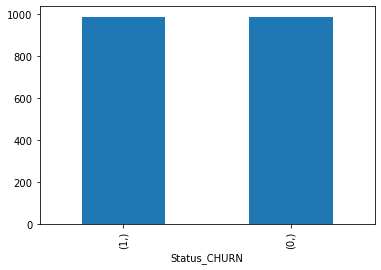

In [18]:
# checkign class imbalance
y.value_counts().plot(kind='bar');

In [19]:
X

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,CUS_Target,CUS_Gender_MALE,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED,TAR_Desc_LOW,TAR_Desc_MIDLE,TAR_Desc_PLATINUM
0,49,7.116640e+03,25,277,265,345,1.459127e+06,1.230543e+06,2.068642e+06,10,...,2231,1,1,0,0,0,0,0,0,0
1,46,1.500000e+06,14,37,15,45,3.537255e+04,2.013400e+04,8.385667e+04,2,...,2223,0,0,0,0,1,0,1,0,0
2,53,5.000000e+06,14,31,14,8,2.824885e+04,4.777660e+03,4.348950e+03,14,...,2222,0,0,0,0,1,0,0,1,0
3,15,5.000000e+02,14,0,1,0,0.000000e+00,4.000000e+03,0.000000e+00,5,...,2223,0,0,0,0,1,0,1,0,0
4,48,9.000000e+06,5,15,33,12,6.908338e+04,2.230075e+05,4.637940e+04,8,...,2223,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,41,3.000000e+06,14,5,1,0,7.294110e+02,2.539839e+02,0.000000e+00,1,...,2223,1,0,0,0,1,0,1,0,0
1968,31,1.000000e+05,14,0,0,0,6.523691e+00,5.943567e+03,0.000000e+00,0,...,2223,1,0,0,0,1,0,1,0,0
1969,53,3.583243e+06,14,7,0,0,8.522462e+03,0.000000e+00,0.000000e+00,0,...,2222,1,0,0,0,1,0,0,0,0
1970,33,1.000000e+06,14,1,1,0,8.190092e+01,7.186754e+03,0.000000e+00,0,...,2222,0,0,0,0,1,0,0,0,0


# FINAL MODEL

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_predr=rfc.predict(X_test)
print(confusion_matrix(y_test,y_predr))
print(accuracy_score(y_test,y_predr))
print(classification_report(y_test,y_predr))

<ipython-input-20-5d17a1a5ebbf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


[[170  32]
 [ 14 179]]
0.8835443037974684
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       202
           1       0.85      0.93      0.89       193

    accuracy                           0.88       395
   macro avg       0.89      0.88      0.88       395
weighted avg       0.89      0.88      0.88       395



In [21]:
rfc1=DecisionTreeClassifier()

rfc1.fit(X_train,y_train)
y_predd=rfc1.predict(X_test)
print(confusion_matrix(y_test,y_predd))
print(accuracy_score(y_test,y_predd))
print(classification_report(y_test,y_predd))

[[164  38]
 [ 25 168]]
0.8405063291139241
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       202
           1       0.82      0.87      0.84       193

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.svm import SVC

In [27]:
rfc2=neighbors.KNeighborsClassifier()

rfc2.fit(X_train,y_train)
y_predk=rfc2.predict(X_test)
print(confusion_matrix(y_test,y_predk))
print(accuracy_score(y_test,y_predk))
print(classification_report(y_test,y_predk))


#model = neighbors.KNeighborsClassifier()
#model = SVC(kernel='poly',degree=4  C= 1)

[[164  38]
 [ 22 171]]
0.8481012658227848
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       202
           1       0.82      0.89      0.85       193

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



<ipython-input-27-6dce41a0e7e2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  rfc2.fit(X_train,y_train)


In [26]:
rfc3=LogisticRegression()

rfc3.fit(X_train,y_train)
y_predl=rfc3.predict(X_test)
print(confusion_matrix(y_test,y_predl))
print(accuracy_score(y_test,y_predl))
print(classification_report(y_test,y_predl))

[[168  34]
 [ 23 170]]
0.8556962025316456
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       202
           1       0.83      0.88      0.86       193

    accuracy                           0.86       395
   macro avg       0.86      0.86      0.86       395
weighted avg       0.86      0.86      0.86       395



/Users/sameerkhan/pythonnotebook/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test,y_predr, pos_label=1)

In [29]:
auc_score1 = roc_auc_score(y_test,y_predr)
print(auc_score1)

0.8845226491561072


In [30]:
fpr2, tpr2, thresh2 = roc_curve(y_test,y_predd, pos_label=1)

In [31]:
auc_score2 = roc_auc_score(y_test,y_predd)
print(auc_score2)

0.8411737546811676


In [32]:
fpr3, tpr3, thresh3 = roc_curve(y_test,y_predk, pos_label=1)

In [33]:
auc_score3 = roc_auc_score(y_test,y_predk)
print(auc_score3)

0.8489457754065564


In [34]:
fpr4, tpr4, thresh4 = roc_curve(y_test,y_predl, pos_label=1)

In [35]:
auc_score4 = roc_auc_score(y_test,y_predl)
print(auc_score4)

0.8562560919304365


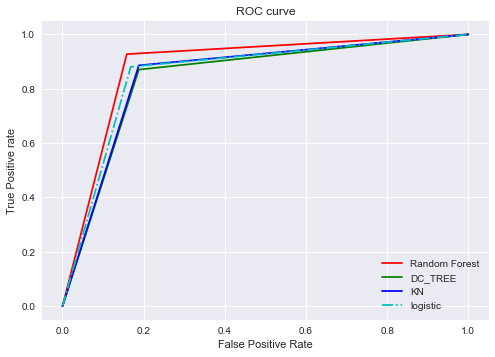

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='RED', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='-',color='GREEN', label='DC_TREE')
plt.plot(fpr3, tpr3, linestyle='-',color='BLUE', label='KN')
plt.plot(fpr4, tpr4, linestyle='-.',color='c', label='logistic')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=370)
plt.show();

# GOING WITH RANDOM FOREST AS ITS GIVES BETTER RESULTS WHEN COMPARED TO OTHER MODELS

In [37]:
model=RandomForestClassifier()

In [38]:
grid_param = {
             "max_features": range(17,22,2),
              'max_depth' : range(14,23,1),
              'min_samples_leaf' : range(1,2,1),
              'min_samples_split': range(2,3,1),
              "bootstrap": [True, False],
              "n_estimators" : range(100,110,2),
              "n_jobs":[-1],
              "criterion" : ["entropy"]
}
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)




In [39]:

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.5min finished
/Users/sameerkhan/pythonnotebook/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['entropy'],
                         'max_depth': range(14, 23),
                         'max_features': range(17, 22, 2),
                         'min_samples_leaf': range(1, 2),
                         'min_samples_split': range(2, 3),
                         'n_estimators': range(100, 110, 2), 'n_jobs': [-1]},
             verbose=3)

In [40]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -1}

In [52]:
rfcg=RandomForestClassifier(criterion='entropy',bootstrap=True,max_depth=16,max_features=17,min_samples_leaf=1,min_samples_split=2,n_estimators=100)

rfcg.fit(X_train,y_train)
y_predsmg=rfcg.predict(X_test)
print(confusion_matrix(y_test,y_predsmg))
print(accuracy_score(y_test,y_predsmg))
print(classification_report(y_test,y_predsmg))

<ipython-input-52-acb824f2dc0c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcg.fit(X_train,y_train)


[[176  26]
 [ 12 181]]
0.9037974683544304
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       202
           1       0.87      0.94      0.90       193

    accuracy                           0.90       395
   macro avg       0.91      0.90      0.90       395
weighted avg       0.91      0.90      0.90       395



In [53]:
import seaborn as sns
cm=confusion_matrix(y_test,y_predsmg)
print(cm)

[[176  26]
 [ 12 181]]


<AxesSubplot:>

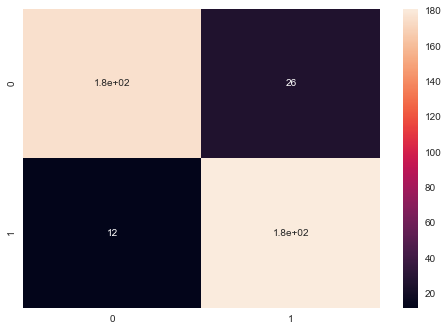

In [54]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [45]:
labels = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt=‘’, cmap='Blues')

SyntaxError: invalid character in identifier (<ipython-input-45-d489dbf9b997>, line 1)

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
from scipy.stats import uniform

In [48]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               "n_jobs":[7],
               'n_estimators': [130, 180, 230]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=96, n_jobs = -1)

In [49]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.8s finished
/Users/sameerkhan/pythonnotebook/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230],
                                        'n_jobs': [7]},
                   random_state=96, verbose=2)

In [55]:
rf_random.best_params_

{'n_jobs': 7,
 'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [56]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=130,
                       n_jobs=7)

In [44]:
rfcr=RandomForestClassifier(criterion='entropy',bootstrap = False  ,max_depth=60,max_features='sqrt',min_samples_leaf=2,min_samples_split=2,n_estimators=230)

rfcr.fit(X_train,y_train)
y_predsmr=rfcr.predict(X_test)
print(confusion_matrix(y_test,y_predsmr))
print(accuracy_score(y_test,y_predsmr))
print(classification_report(y_test,y_predsmr))

<ipython-input-44-c98ebbdd005e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcr.fit(X_train,y_train)


[[196  15]
 [  8 170]]
0.9408740359897172
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       211
           1       0.92      0.96      0.94       178

    accuracy                           0.94       389
   macro avg       0.94      0.94      0.94       389
weighted avg       0.94      0.94      0.94       389



In [45]:
fprg, tprg, threshg = roc_curve(y_test,y_predsmg, pos_label=1)
fprr, tprr, threshr = roc_curve(y_test,y_predsmr, pos_label=1)

In [46]:
auc_scoreg = roc_auc_score(y_test,y_predsmg)
auc_scorer = roc_auc_score(y_test,y_predsmr)
print(auc_scoreg)
print(auc_scorer)

0.9212684381489962
0.941983066190958


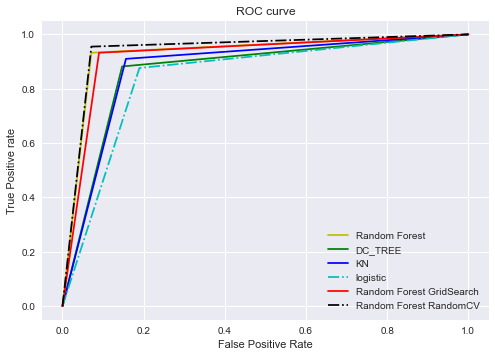

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='y', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='-',color='GREEN', label='DC_TREE')
plt.plot(fpr3, tpr3, linestyle='-',color='BLUE', label='KN')
plt.plot(fpr4, tpr4, linestyle='-.',color='c', label='logistic')
plt.plot(fprg, tprg, linestyle='-',color='red', label='Random Forest GridSearch')
plt.plot(fprr, tprr, linestyle='-.',color='k', label='Random Forest RandomCV')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=770)
plt.show();

# FINAL MODEL IS RANDOM FOREST CAUSE IT HAS BEST ROC SCORE WHEN TUNE WITH THE HELP OF RandomCV